In [1]:
# The data_dir variable is the only input allowed to your code. 
# Do not modify any file names in the image directory.
data_dir = "./MASI_pets"
# Add your code in the cells.

In [2]:
# Import packages
from os import listdir
from pathlib import Path
from math import ceil
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
 
%matplotlib inline

In [3]:
# Task 1: Scan the image files to gather image meta data.

img_folder_dir = Path(data_dir)

# Dataframe to store meta data
df = pd.DataFrame(columns=['Name', 'Dimension', 'Size', 'Aspect_ratio','Pet','Owner'])

for fn in listdir(img_folder_dir):
    # String operation
    pet_owner_name = fn.split('.')[0]
    pet_name = pet_owner_name.split('_')[0]
    owner_name = pet_owner_name.split('_')[1]
    # Load image
    img_dir = img_folder_dir / fn
    img = mpimg.imread(img_dir)
    # Image info
    img_dimension = img.shape
    img_size = img.shape[0] * img.shape[1]
    img_ratio = img.shape[1] / img.shape[0] # width / height
    # Append row to dataframe
    df = pd.concat([df, pd.DataFrame([[fn,img_dimension,img_size,img_ratio,pet_name,owner_name]],
                                    columns=['Name', 'Dimension', 'Size', 'Aspect_ratio','Pet','Owner'])                                    
                                    ],
                                    ignore_index = True)
# Sorting
df.sort_values(by=['Size','Pet'],ascending=[False,True], ignore_index=True)

,Name,Dimension,Size,Aspect_ratio,Pet,Owner
0,Yasha_SR.jpg,"(4608, 3456, 3)",15925248,0.75,Yasha,SR
1,Arthur_FR.jpg,"(4032, 3024, 3)",12192768,0.75,Arthur,FR
2,August_XY.jpg,"(4032, 3024, 3)",12192768,0.75,August,XY
3,Disney_XY.jpg,"(3024, 4032, 3)",12192768,1.333333,Disney,XY
4,Francie_CK.jpg,"(4032, 3024, 3)",12192768,0.75,Francie,CK
5,Hamilton_CK.png,"(4032, 3024, 4)",12192768,0.75,Hamilton,CK
6,Mango_LC.jpg,"(4032, 3024, 3)",12192768,0.75,Mango,LC
7,Ruby and Buddy_MK.jpg,"(4032, 3024, 3)",12192768,0.75,Ruby and Buddy,MK
8,Xiaomi_CG.jpeg,"(4032, 3024, 3)",12192768,0.75,Xiaomi,CG
9,Ziggy_NN.jpg,"(4032, 3024, 3)",12192768,0.75,Ziggy,NN


Text(0.5, 0, 'Image Size (Number of Pixels)')

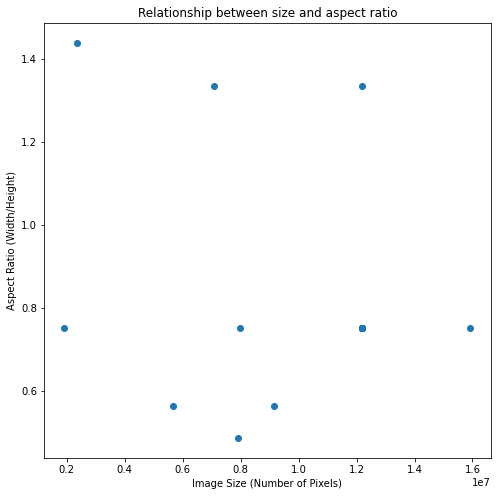

In [4]:
# Task 2: Look at the meta data to assess differences in the dataset.

# Retrieve values of the two features
x = df['Size'].values
y = df['Aspect_ratio'].values

fig = plt.figure(figsize=(8,8))
plt.scatter(x, y)
plt.title('Relationship between size and aspect ratio')
plt.ylabel('Aspect Ratio (Width/Height)')
plt.xlabel('Image Size (Number of Pixels)')

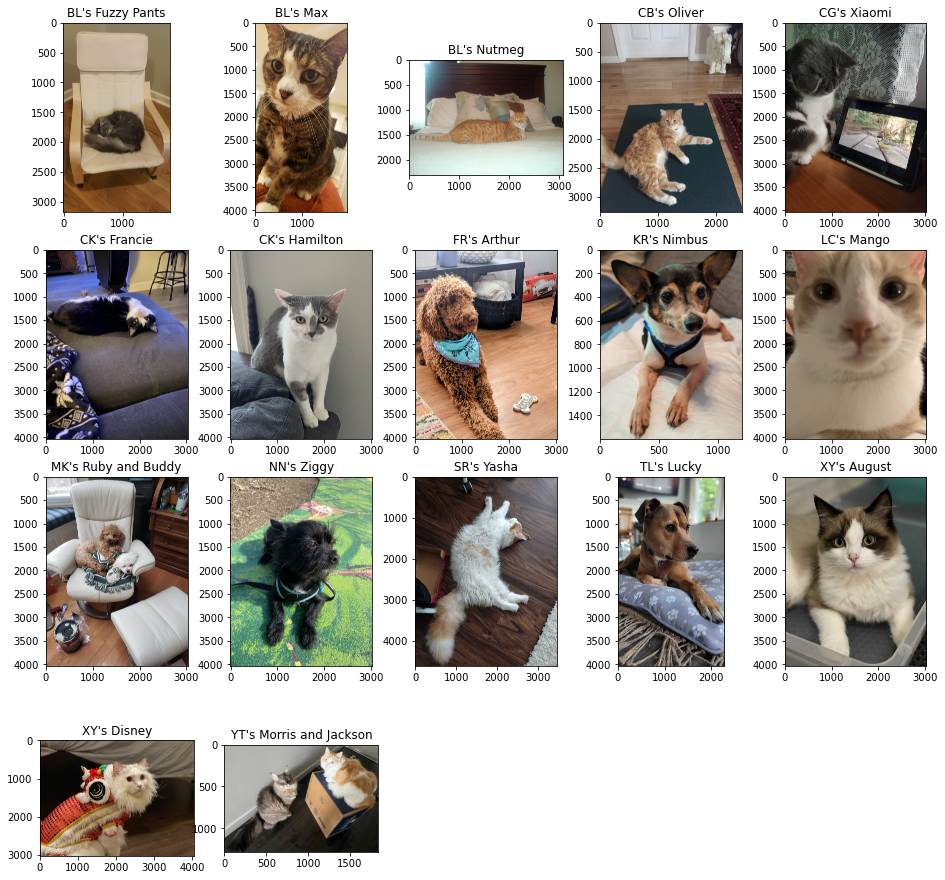

In [5]:
# Task 3: Look at the image data to check quality.

# layout of the figure
num_img = len(listdir(img_folder_dir)) # number of subplots
num_col = 5
num_row = ceil(num_img/num_col)

# Sorting images
df_plot = df.sort_values(by=['Owner','Pet'], ignore_index=True)

plt.figure(figsize=(16,16))
for i in range(num_img):
    # Retrieve info from dataframe
    fn = df_plot['Name'][i]
    img_dir = img_folder_dir / fn
    owner_name = df_plot['Owner'][i]
    pet_name = df_plot['Pet'][i]
    # create subplot
    plt.subplot(num_row,num_col,i+1)
    # load image
    img = mpimg.imread(img_dir)
    plt.imshow(img)
    plt.title(owner_name+"'s "+pet_name)